# Plotting and Visualization

## A Brief matplotlib API Primer
> import matplotlib.pyplot as plt

### Figures and Subplots

pyplot.subplots(nrows=, ncols= sharex=False, sharey=False)
- sharex / sharey : 모든 subplots의 x축 / y축을 같게할 것인가?

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
fig = plt.figure() #그래프를 보여주기 위한 캔버스 라고 생각하자!

<Figure size 432x288 with 0 Axes>

In [103]:
ax1 = fig.add_subplot(2, 2, 1); #figure 안에 subplot 2행 2열 그래프 중 첫번째 AxesSubplot 객체
ax2 = fig.add_subplot(2, 2, 2);
ax3 = fig.add_subplot(2, 2, 3);

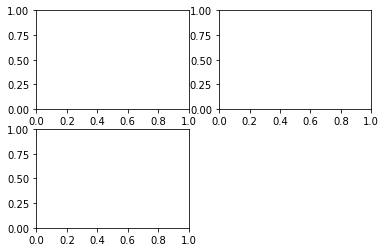

In [104]:
fig

In [105]:
 from numpy.random import randn

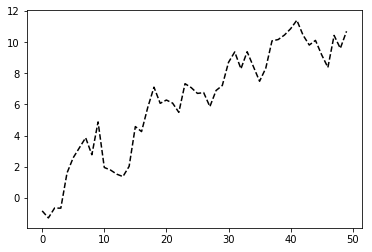

In [109]:
plt.plot(randn(50).cumsum(), 'k--') #k-- : black, dashed-line

plt.plot을 하면 맨 마지막 figure와 맨 마지막 subplot에 그래프가 그려짐

In [111]:
ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

(array([ 1.,  0.,  1.,  2.,  6.,  7.,  7., 14., 15., 14.,  7.,  9.,  5.,
         2.,  5.,  1.,  2.,  1.,  0.,  1.]),
 array([-2.72397224, -2.42564342, -2.1273146 , -1.82898579, -1.53065697,
        -1.23232815, -0.93399934, -0.63567052, -0.3373417 , -0.03901288,
         0.25931593,  0.55764475,  0.85597357,  1.15430238,  1.4526312 ,
         1.75096002,  2.04928883,  2.34761765,  2.64594647,  2.94427529,
         3.2426041 ]),
 <a list of 20 Patch objects>)

In [112]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

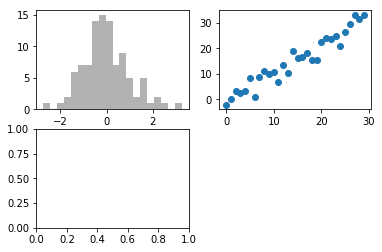

In [113]:
fig

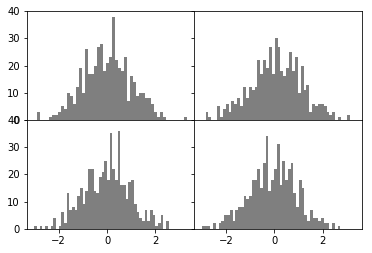

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) #모든 subplot의 x축과 y축을 같게 함
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) #subplot간의 사이 너비와 높이를 0으로

### Colors, Markers, and Line Styles

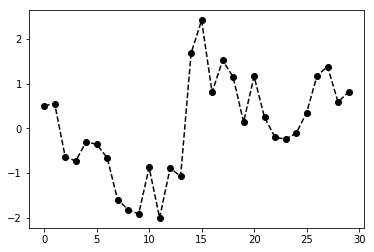

In [114]:
a = plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

= plt.plot(randn(30).cumsum(), 'ko--') !!color-markers-line styles 순

스타일 정리된 사이트
★ color chart : https://matplotlib.org/examples/color/named_colors.html
   marker : https://matplotlib.org/api/markers_api.html
   line style:
  https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
    https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html

### Ticks, Labels, and Legends

- ax.set_xticks([x 값 목록]) / ax.set_yticks([y값 목록])
- ax.set_xtickslabels([label 값 목록]) / ax.set_ytickslabels([label 값 목록])
- ax.set_xlim(['처음', '끝']) / ax.set_ylim(['처음', '끝'])
- ax.set_title('제목')
- ax.set_xlabel / ax.set_ylabel
- ax.legend(loc=) # legend 위치 paramter https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

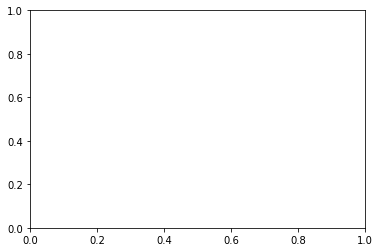

In [116]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [117]:
ax.plot(randn(1000).cumsum())

In [118]:
ax.set_xticks([0, 250, 500, 750, 1000])

In [119]:
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
....: rotation=30, fontsize='small')

[Text(0,0,'one'),
 Text(0.2,0,'two'),
 Text(0.4,0,'three'),
 Text(0.6,0,'four'),
 Text(0.8,0,'five')]

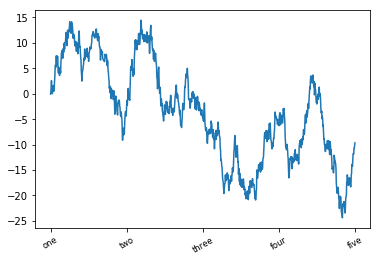

In [120]:
fig

In [121]:
ax.set_title('My first matplotlib plot')

Text(0.5,1,'My first matplotlib plot')

In [122]:
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

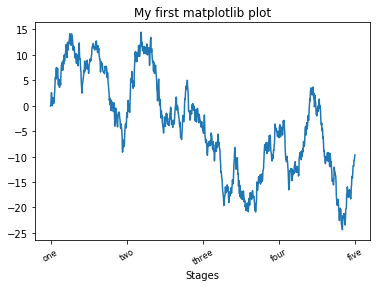

In [123]:
fig

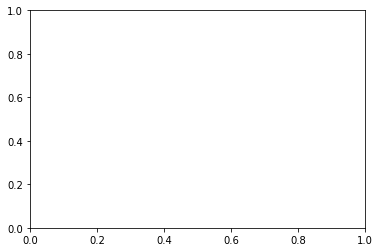

In [124]:
fig = plt.figure(); ax=fig.add_subplot(1, 1, 1)

In [125]:
ax.plot(randn(1000).cumsum(), 'k', label='one');
ax.plot(randn(1000).cumsum(), 'k--', label='two');
ax.plot(randn(1000).cumsum(), 'k.', label='three');
ax.legend(loc='best') #legend를 그래프를 가리지 않는 적절한 위치에 자동 배정

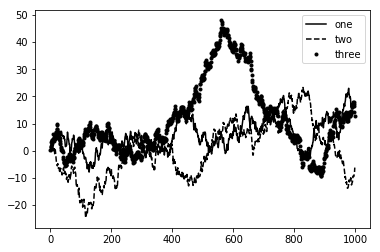

In [126]:
fig

### Annotations(주석) and Drawing on a Subplot

- ax.annotate('주석으로 쓸 내용', 지점의 xy 좌표, 주석의 위치 xy좌표, 화살표의 속성)
기타 옵션 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html

In [128]:
from datetime import datetime

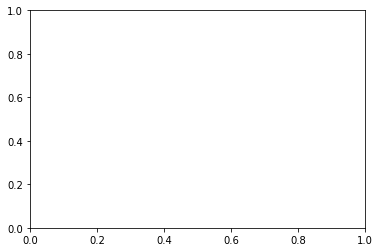

In [129]:
fig = plt.figure();
ax = fig.add_subplot(1, 1, 1)

In [130]:
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-') #subplot의 위치 지정, style 지정
crisis_data = [
 (datetime(2007, 10, 11), 'Peak of bull market'),
 (datetime(2008, 3, 12), 'Bear Stearns Fails'),
 (datetime(2008, 9, 15), 'Lehman Bankruptcy') # 주석을 넣을 데이터 지정
] #리스트 안에 튜플
for date, label in crisis_data:
 ax.annotate(label, xy=(date, spx.asof(date) + 50), # 주석 표시할 지점
 xytext=(date, spx.asof(date) + 200), # 주석 위치
 arrowprops=dict(facecolor='black'), # 화살표의 속성 
 horizontalalignment='left', verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

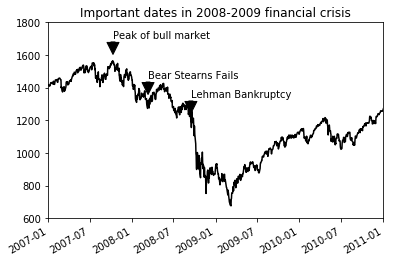

In [131]:
fig

### Saving Plots to File
- plt.savefig('figpath.png')

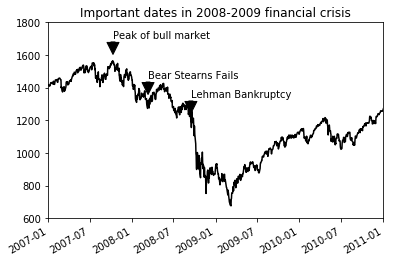

In [132]:
fig

In [133]:
fig.savefig('figure.png', dpi=400, bbox_inches='tight')

## Plotting Functions in pandas

- series.plot() / dataframe.plot() : plot 내장 메쏘드가 존재
- 옵션 : label, ax, style, alpha, kind, sticks, yticks, xlim, ylim, grid..

### Line Plots

In [134]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

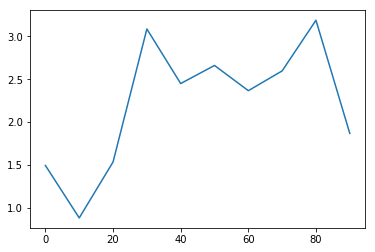

In [135]:
s.plot()

In [136]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
 ....: columns=['A', 'B', 'C', 'D'],
 ....: index=np.arange(0, 100, 10))

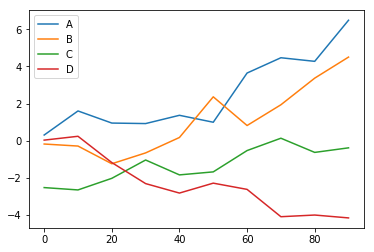

In [137]:
df.plot()

### Bar Plots

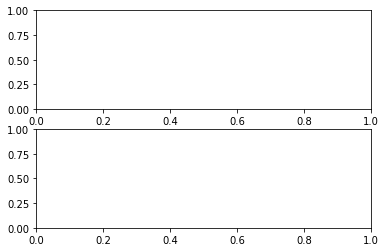

In [139]:
fig, axes = plt.subplots(2,1)

In [140]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [141]:
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7);
data.plot(kind='bar', ax=axes[1], color='k', alpha=0.7)

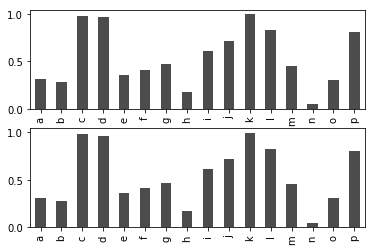

In [142]:
fig

In [143]:
df = pd.DataFrame(np.random.rand(6, 4),
 ....: index=['one', 'two', 'three', 'four', 'five', 'six'],
 ....: columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

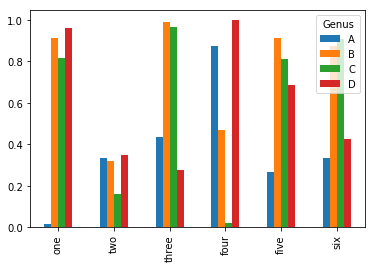

In [144]:
df.plot(kind='bar')

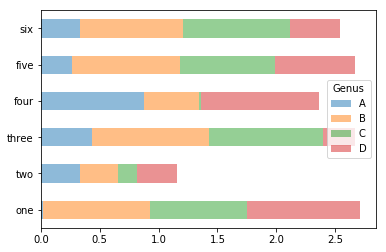

In [145]:
df.plot(kind='barh', stacked=True, alpha=0.5) #데이터를 쌓아서 그래프 보여주기

In [146]:
tips = pd.read_csv('ch08/tips.csv')

In [147]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [148]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [149]:
party_counts = party_counts.ix[:, 2:5] #첫번째 사람과 6번째 사람 제외

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [150]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
#party_counts를 party_counts의 행 기준의 합으로 나누기

In [151]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


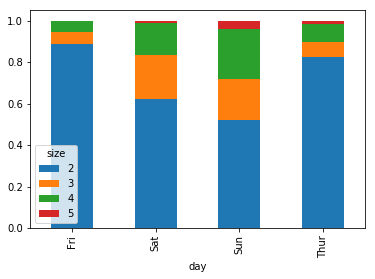

In [152]:
party_pcts.plot(kind='bar', stacked=True)

### Histograms and Density Plots

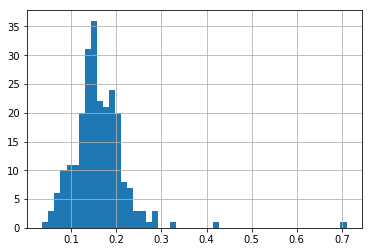

In [153]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'];
tips['tip_pct'].hist(bins=50)

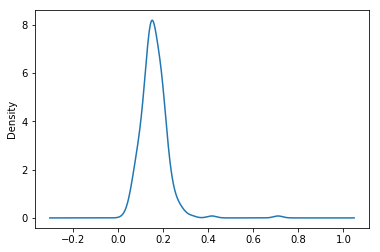

In [154]:
tips['tip_pct'].plot(kind='kde') #kind='kde' 옵션 : 밀도 히스토그램을 그려라.

In [155]:
comp1 = np.random.normal(0, 1, size=200); # N(0, 1)
comp2 = np.random.normal(10, 2, size=200); # N(10, 4)

In [156]:
values = pd.Series(np.concatenate([comp1, comp2]))

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


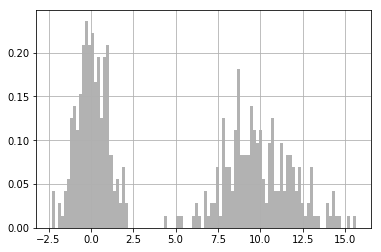

In [157]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)

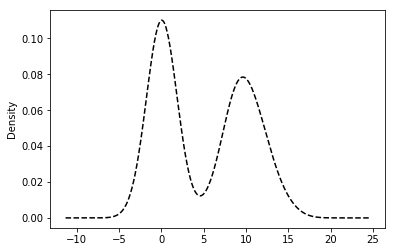

In [158]:
values.plot(kind='kde', style='k--')

### Scatter Plots

In [159]:
macro = pd.read_csv('ch08/macrodata.csv')

In [160]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']] #한꺼번에 데이터 불러오기

In [161]:
trans_data = np.log(data).diff().dropna() #뒤의 데이터에서 앞의 데이터 빼기

In [162]:
trans_data[-5:] #뒤에서 5번째 데이터부터 끝까지

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

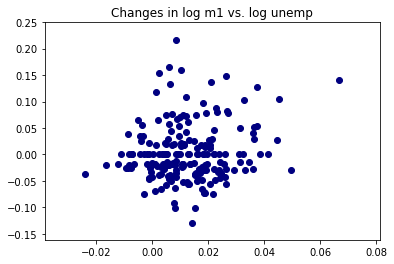

In [163]:
plt.scatter(trans_data['m1'], trans_data['unemp'], color='navy')
plt.title('Changes in log %s vs. log %s' %('m1', 'unemp'))

### Plotting Maps: Haiti의 재난 Data를 예시로
- from mpl_toolkits.basemap import Basemap

In [4]:
data = pd.read_csv('ch08/Haiti.csv')

In [5]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [6]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [7]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
....: (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
....: & data.CATEGORY.notnull()] #조건에 맞는 data 뽑아내기

In [37]:
def to_cat_list(catstr): #category 리스트를 얻는 함수
 stripped = (x.strip() for x in catstr.split(','))
 return [x for x in stripped if x]
def get_all_categories(cat_series): #cateogry 리스트에서, 유일한 category를 반환
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
#cat series에 있는 x를 category 집합으로 만들어 cat_sets에 저장
    return sorted(set.union(*cat_sets)) 
#cat_sets의 집합들의 합집합을 sorting한 리스트 반환
def get_english(cat):
 code, names = cat.split('.')
 if '|' in names:
    names = names.split(' | ')[1]
 return code, names.strip()

In [38]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [39]:
all_cats = get_all_categories(data.CATEGORY)

In [40]:
all_cats

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

In [41]:
english_mapping = dict(get_english(x) for x in all_cats)

In [44]:
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [45]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [46]:
all_codes = get_code(all_cats)

In [47]:
code_index = pd.Index(np.unique(all_codes))

In [48]:
dummy_frame = pd.DataFrame(np.zeros((len(data), len(code_index))),
 index=data.index, columns=code_index)

In [49]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
data = data.join(dummy_frame.add_prefix('category_'))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
 # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere', #stereographic : 입체 사진
    lon_0=(urlon + lllon) / 2, #지도 중심의 위도, 경도 지정
    lat_0=(urlat + lllat) / 2,
    llcrnrlat=lllat, urcrnrlat=urlat, #나타낼 지도의 좌측하단, 우측하단 위도
    llcrnrlon=lllon, urcrnrlon=urlon, #나타낼 지도의 좌측하단, 우측하단 경도
    resolution='f')
 #해안선, state선, 국경선 표시하기
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

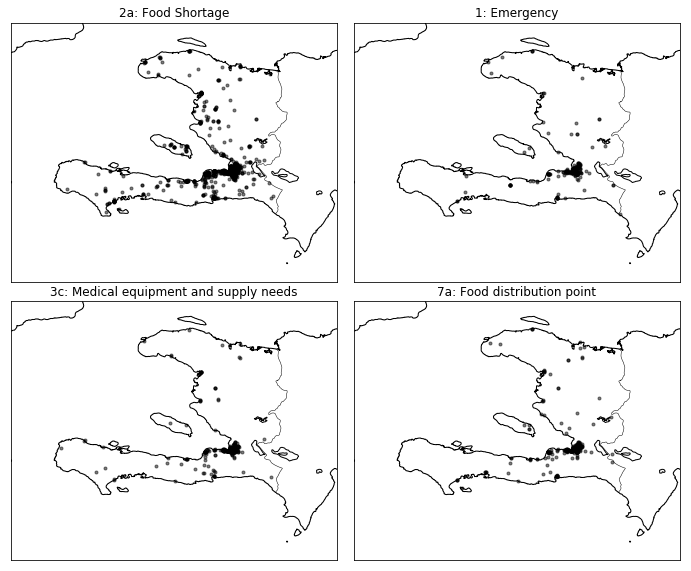

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
to_plot = ['2a', '1', '3c', '7a']
lllat=17.25; urlat=20.25; lllon=-75; urlon=-71;
for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
    cat_data = data[data['category_%s' % code] == 1]
 # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))